In [1]:
import sys  
sys.path.insert(1, '.\..\..\SOURCES\.')

import random

random.seed(10)

from DATA import InubushiFunction

data = InubushiFunction(nu=-1)
data.delay_timeseries(1)
data.split([80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()


In [2]:
from IPMask import IPMask

In [3]:
from Metrics import *
from IPReservoir import IPReservoir

In [4]:
ip_res = IPReservoir(N=100, bias=False, desired_rho=0.8, mask=IPMask.bimodal(100, std=0.15,)) #Wu_sparsity=0.5, Wh_sparsity=0.5)

- Epoch: 1) | KL Divergence value: 0.05359123274683952. | Spectral radius: 0.8078131675720215
- Epoch: 2) | KL Divergence value: 0.04227238520979881. | Spectral radius: 0.8156235218048096
- Epoch: 3) | KL Divergence value: 0.03598668426275253. | Spectral radius: 0.8231930136680603
- Epoch: 4) | KL Divergence value: 0.03218938410282135. | Spectral radius: 0.8306329846382141
- Epoch: 5) | KL Divergence value: 0.02974921278655529. | Spectral radius: 0.8380728960037231
- Epoch: 6) | KL Divergence value: 0.02810467779636383. | Spectral radius: 0.8455120325088501
- Epoch: 7) | KL Divergence value: 0.02695639617741108. | Spectral radius: 0.8529471755027771
- Epoch: 8) | KL Divergence value: 0.02613397315144539. | Spectral radius: 0.8603875041007996
- Epoch: 9) | KL Divergence value: 0.025520682334899902. | Spectral radius: 0.8674533367156982
- Epoch: 10) | KL Divergence value: 0.025068078190088272. | Spectral radius: 0.8745198249816895
- Epoch: 11) | KL Divergence value: 0.024732911959290504.

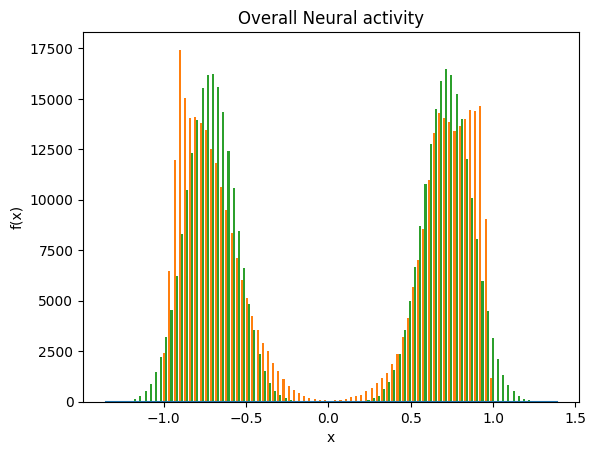

In [5]:
ip_res = IPReservoir(N=100, bias=False, desired_rho=0.8, mask=IPMask.bimodal(100, std=0.15,)) #Wu_sparsity=0.5, Wh_sparsity=0.5)
ip_res.IP_online(X_TR, eval_kl=X_TR, eta=0.0000025, epochs=15 ,verbose = True)
ip_res.plot_neural_activity(X_TR)

In [6]:
from Evaluator import Evaluator

In [7]:
Evaluator.evaluate_estrinsic(ip_res, data,)

Reservoir warmed up with the first 100 time steps


tensor(1.1908e-05)

In [8]:
DeltaPhi().evaluate(ip_res)

0.6626193776138894

In [9]:
MC().evaluate(ip_res)


tensor(7.7409)

In [10]:
Neff().evaluate(ip_res)

1.6590899982574185

In [11]:
MLLE(X_TS).evaluate(ip_res)

-0.86514974

In [12]:
KL().evaluate(ip_res)

tensor(0.0241)